In [1]:
# import necessary library, tools, modules
from pyenzyme.enzymeml.tools import EnzymeMLReader
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#basic/general settings
sns.set_theme(style="whitegrid", palette ='bright',color_codes=True, context = 'notebook')

In [7]:
#path of examining experiment
path = 'pyenzyme/Resources/Examples/ThinLayers/COPASI/3IZNOK_TEST/3IZNOK_TEST.omex'
filename = os.path.split(path)[-1].split('.')[0]
dirpath = os.path.dirname(path)

#saving plots in new folf´der
try:
    # Create directory for plots (new folder)
    os.mkdir(os.path.join(dirpath, f"{filename}_Plots" ) )

#circumvent FileExistsError
except FileExistsError:
    
    # If already there continue
    pass
# path to new created folder
dirpath = os.path.join( os.path.dirname(path), f"{filename}_Plots" )

#read EnzymML document 
enzmldoc = EnzymeMLReader().readFromFile(path)

# overview of document
print(enzmldoc)

>>> Units
	ID: u0 	 Name: l
	ID: u1 	 Name: uM
	ID: u2 	 Name: mM
	ID: u3 	 Name: K
	ID: u4 	 Name:  / s
	ID: u5 	 Name: mmole / l
>>> Reactants
	ID: s0 	 Name: indole
	ID: s1 	 Name: O-phospho-L-serine
	ID: s2 	 Name: L-Tryptophan
	ID: s3 	 Name: HPO4(2-)
>>> Proteins
	ID: p0 	 Name: TrpB2o from Arabidopsis thaliana 10.0 microM
>>> Reactions
	ID: r0 	 Name: steady-state kinetics with TrpB2o from Arabidopsis thaliana PConc: 10.00 uM


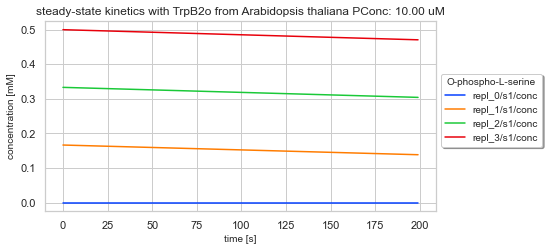

In [25]:
# iterates over all reactions
for id_, reac in enzmldoc.getReactionDict().items():
    
    
    # reac: Reaction Objekt
    # id_: IDentifier
    
    reaction_name = reac.getName()
    
    #### Educts ####
    for reactant_id, stoich, _, replicates, init_conc in reac.getEducts():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, stoichiometry, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time = df.index.name.split('/')[0]
            time_unit = df.index.name.split('/')[1]
            
            f, ax = plt.subplots(figsize=(7,3.5))
            
            # Visualisation
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit_name = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit = enzmldoc.getUnitDict()[unit_name].getName()
                
                sns.lineplot( x=time_val, y=df[col], label = col )
            
            #set graph title, legend, axes 
            ax.set_title(reaction_name, fontsize = 12)

            ax.legend(fontsize = 10, \
                       bbox_to_anchor= (1, 0.75), \
                       title= name, \
                       title_fontsize = 10, \
                       shadow = True, \
                       facecolor = 'white');

            xlabel = f"{time} [{time_unit}]"
            ylabel = f"{'concentration'} [{unit}]"

            ax.set_xlabel(xlabel , fontsize=10)
            ax.set_ylabel(ylabel, fontsize=10)

            #save as svg
            fname = os.path.join( dirpath, f"{id_}_{name}_Educt.svg" )
            plt.savefig(fname, bbox_inches = 'tight', format='svg')
            

    #### Products ####
    
    for reactant_id, stoich, _, replicates, init_conc in reac.getProducts():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, stoichiometry, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time = df.index.name.split('/')[0]
            time_unit = df.index.name.split('/')[1]
            
            f, ax = plt.subplots(figsize=(7,3.5))
            
            # Visualisation
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit_name = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit = enzmldoc.getUnitDict()[unit_name].getName()
                
                sns.lineplot( x=time_val, y=df[col], label = col )
            
            #set graph title, legend, axes 
            ax.set_title(reaction_name, fontsize = 12)

            ax.legend(fontsize = 10, \
                       bbox_to_anchor= (1, 0.75), \
                       title= name, \
                       title_fontsize = 10, \
                       shadow = True, \
                       facecolor = 'white');

            xlabel = f"{time} [{time_unit}]"
            ylabel = f"{'concentration'} [{unit}]"

            ax.set_xlabel(xlabel , fontsize=10)
            ax.set_ylabel(ylabel, fontsize=10)

            #save as svg
            fname = os.path.join( dirpath, f"{id_}_{name}_Product.svg" )
            plt.savefig(fname, bbox_inches = 'tight', format='svg')
            
            
    #### Modifiers ####
    for reactant_id, stoich, _, replicates, init_conc in reac.getModifiers():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, stoichiometry, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time = df.index.name.split('/')[0]
            time_unit = df.index.name.split('/')[1]
            
            f, ax = plt.subplots(figsize=(7,3.5))
            
            # Visualisation
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit_name = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit = enzmldoc.getUnitDict()[unit_name].getName()
                
                sns.lineplot( x=time_val, y=df[col], label = col )
            
            #set graph title, legend, axes 
            ax.set_title(reaction_name, fontsize = 12)

            ax.legend(fontsize = 10, \
                       bbox_to_anchor= (1, 0.75), \
                       title= name, \
                       title_fontsize = 10, \
                       shadow = True, \
                       facecolor = 'white');

            xlabel = f"{time} [{time_unit}]"
            ylabel = f"{'concentration'} [{unit}]"

            ax.set_xlabel(xlabel , fontsize=10)
            ax.set_ylabel(ylabel, fontsize=10)

            #save as svg
            fname = os.path.join( dirpath, f"{id_}_{name}_Modifier.svg" )
            plt.savefig(fname, bbox_inches = 'tight', format='svg')